In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

# bipartite network B
B = nx.Graph()

In [2]:
B.add_nodes_from(['Ph1', 'Ph2', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Ph7', 'Ph8'], bipartite=0)  # physicians
B.add_nodes_from(['Pa1', 'Pa2', 'Pa3', 'Pa4', 'Pa5', 'Pa6', 'Pa7'], bipartite=1)  # patients

In [3]:
B.add_edges_from([('Ph1', 'Pa1'), ('Ph2', 'Pa1'), ('Ph4', 'Pa1'),
                  ('Ph2', 'Pa2'), ('Ph3', 'Pa2'), ('Ph4', 'Pa2'),
                  ('Ph2', 'Pa3'), ('Ph3', 'Pa3'), ('Ph4', 'Pa3'),
                  ('Ph5', 'Pa4'), ('Ph7', 'Pa4'), ('Ph8', 'Pa4'),
                  ('Ph6', 'Pa5'), ('Ph7', 'Pa5'), ('Ph8', 'Pa5'),
                  ('Ph5', 'Pa6'), ('Ph6', 'Pa6'), ('Ph8', 'Pa6'),
                  ('Ph1', 'Pa7'), ('Ph7', 'Pa7')])

In [4]:
nx.bipartite.sets(B)

({'Ph1', 'Ph2', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Ph7', 'Ph8'},
 {'Pa1', 'Pa2', 'Pa3', 'Pa4', 'Pa5', 'Pa6', 'Pa7'})

In [5]:
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


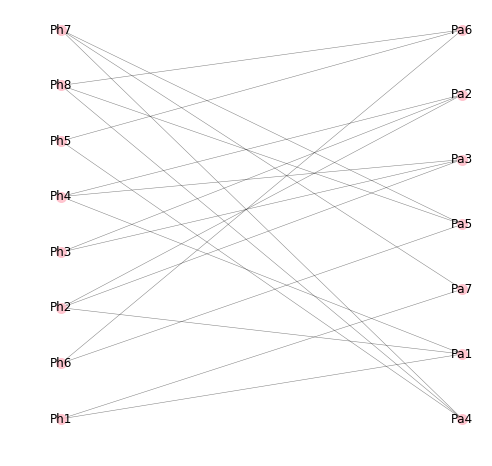

In [6]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(B, pos, node_size=100, node_color='pink', alpha=0.9)
nx.draw_networkx_edges(B, pos, width=0.5, alpha=0.5)
node_labels = nx.draw_networkx_labels(B, pos, font_size = 12, font_family = 'sans-serif')
plt.axis('off')
plt.show()

In [7]:
B.nodes(data=True)

NodeDataView({'Ph1': {'bipartite': 0}, 'Ph2': {'bipartite': 0}, 'Ph3': {'bipartite': 0}, 'Ph4': {'bipartite': 0}, 'Ph5': {'bipartite': 0}, 'Ph6': {'bipartite': 0}, 'Ph7': {'bipartite': 0}, 'Ph8': {'bipartite': 0}, 'Pa1': {'bipartite': 1}, 'Pa2': {'bipartite': 1}, 'Pa3': {'bipartite': 1}, 'Pa4': {'bipartite': 1}, 'Pa5': {'bipartite': 1}, 'Pa6': {'bipartite': 1}, 'Pa7': {'bipartite': 1}})

In [8]:
[(n, d) for n, d in B.nodes(data=True) if d['bipartite'] == 0]

[('Ph1', {'bipartite': 0}),
 ('Ph2', {'bipartite': 0}),
 ('Ph3', {'bipartite': 0}),
 ('Ph4', {'bipartite': 0}),
 ('Ph5', {'bipartite': 0}),
 ('Ph6', {'bipartite': 0}),
 ('Ph7', {'bipartite': 0}),
 ('Ph8', {'bipartite': 0})]

In [9]:
[n for n, d in B.nodes(data=True) if d['bipartite'] == 0]

['Ph1', 'Ph2', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Ph7', 'Ph8']

In [10]:
set(n for n, d in B.nodes(data=True) if d['bipartite'] == 0)

{'Ph1', 'Ph2', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Ph7', 'Ph8'}

In [11]:
physicians = set(n for n, d in B.nodes(data=True) if d['bipartite'] == 0)
patients = set(B) - physicians

In [12]:
physicians

{'Ph1', 'Ph2', 'Ph3', 'Ph4', 'Ph5', 'Ph6', 'Ph7', 'Ph8'}

In [13]:
patients

{'Pa1', 'Pa2', 'Pa3', 'Pa4', 'Pa5', 'Pa6', 'Pa7'}

In [14]:
P = bipartite.weighted_projected_graph(B, physicians)

In [15]:
print(P.nodes(data=True))

[('Ph1', {'bipartite': 0}), ('Ph6', {'bipartite': 0}), ('Ph3', {'bipartite': 0}), ('Ph4', {'bipartite': 0}), ('Ph5', {'bipartite': 0}), ('Ph7', {'bipartite': 0}), ('Ph8', {'bipartite': 0}), ('Ph2', {'bipartite': 0})]


In [16]:
print(P.edges(data=True))

[('Ph1', 'Ph7', {'weight': 1}), ('Ph1', 'Ph4', {'weight': 1}), ('Ph1', 'Ph2', {'weight': 1}), ('Ph6', 'Ph8', {'weight': 2}), ('Ph6', 'Ph5', {'weight': 1}), ('Ph6', 'Ph7', {'weight': 1}), ('Ph3', 'Ph4', {'weight': 2}), ('Ph3', 'Ph2', {'weight': 2}), ('Ph4', 'Ph2', {'weight': 3}), ('Ph5', 'Ph8', {'weight': 2}), ('Ph5', 'Ph7', {'weight': 1}), ('Ph7', 'Ph8', {'weight': 2})]


In [17]:
pos = nx.circular_layout(P)
pos

{'Ph1': array([1.00000000e+00, 1.83784272e-08]),
 'Ph2': array([ 0.70710666, -0.70710685]),
 'Ph3': array([-1.73863326e-08,  9.99999992e-01]),
 'Ph4': array([-0.70710672,  0.70710677]),
 'Ph5': array([-9.99999947e-01, -6.90443471e-08]),
 'Ph6': array([0.70710678, 0.70710677]),
 'Ph7': array([-0.70710678, -0.70710667]),
 'Ph8': array([ 3.82499349e-08, -9.99999955e-01])}

In [18]:
weights = nx.get_edge_attributes(P, 'weight')
weights

{('Ph1', 'Ph2'): 1,
 ('Ph1', 'Ph4'): 1,
 ('Ph1', 'Ph7'): 1,
 ('Ph3', 'Ph2'): 2,
 ('Ph3', 'Ph4'): 2,
 ('Ph4', 'Ph2'): 3,
 ('Ph5', 'Ph7'): 1,
 ('Ph5', 'Ph8'): 2,
 ('Ph6', 'Ph5'): 1,
 ('Ph6', 'Ph7'): 1,
 ('Ph6', 'Ph8'): 2,
 ('Ph7', 'Ph8'): 2}

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


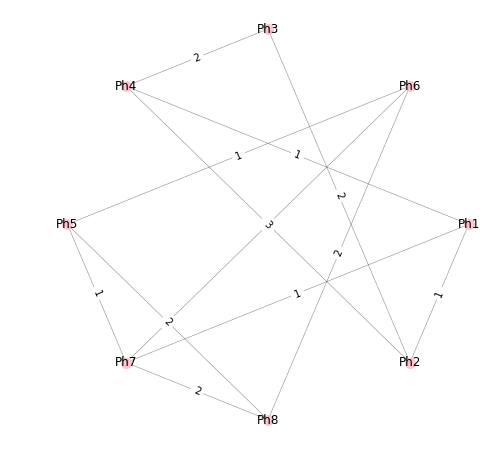

In [19]:
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(P, pos, node_size=100, node_color='pink', alpha=0.9)
nx.draw_networkx_edges(P, pos, width=0.5, alpha=0.5)
node_labels = nx.draw_networkx_labels(P, pos, font_size = 12, font_family = 'sans-serif')
edge_labels = nx.draw_networkx_edge_labels(P, pos, edge_labels=weights)
plt.axis('off')
plt.show()

In [20]:
import community

parts = community.best_partition(P)
values = [parts.get(node) for node in P.nodes()]
values

[0, 1, 0, 0, 1, 1, 1, 0]

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


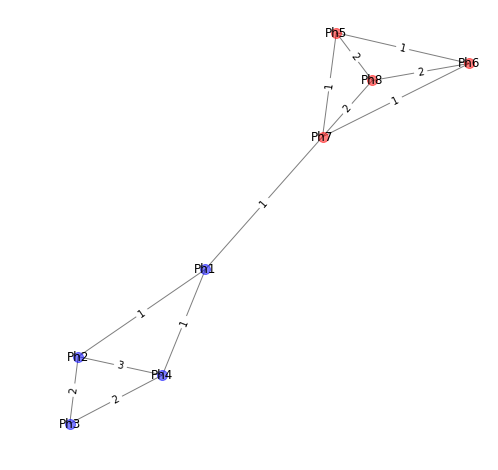

In [25]:
plt.figure(figsize=(8, 8))
com_colors = {1: 'b', 2: 'r', 3: 'g', 4: 'c', 5: 'm', 6: 'y', 7: 'k'}
pos = nx.spring_layout(P)
count = 0
for com in set(parts.values()):
    count += 1
    list_nodes = [nodes for nodes in parts.keys() if parts[nodes] == com]
    nx.draw_networkx_nodes(P, pos, list_nodes, node_size=100, node_color=com_colors[count], alpha=0.5)

nx.draw_networkx_edges(P, pos, alpha=0.5)
node_labels = nx.draw_networkx_labels(P, pos, font_size = 12, font_family = 'sans-serif')
edge_labels = nx.draw_networkx_edge_labels(P, pos, edge_labels=weights)
plt.axis('off')
plt.show()